In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as kf
import matplotlib.pyplot as plt

In [6]:
mnist= tf.keras.datasets.mnist

In [7]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
x_train.shape


(60000, 28, 28)

In [14]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [15]:
x_train=x_train/255
x_test=x_test/255

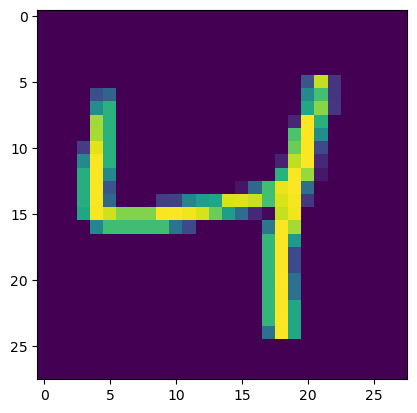

In [17]:
plt.imshow(x_train[2])

In [21]:
model=kf.Sequential([
kf.layers.Flatten(input_shape = (28,28)),
kf.layers.Dense(128,activation='relu'),
kf.layers.Dense(128,activation='softmax')
]

)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
Total params: 116,992
Trainable params: 116,992
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

In [25]:
history=model.fit(x_train,y_train, epochs=30, validation_data=[x_test,y_test])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7953 - accuracy: 0.8231 - val_loss: 0.3755 - val_accuracy: 0.8978
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3547 - accuracy: 0.9015 - val_loss: 0.3137 - val_accuracy: 0.9135
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3073 - accuracy: 0.9128 - val_loss: 0.2766 - val_accuracy: 0.9227
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.9207 - val_loss: 0.2574 - val_accuracy: 0.9283
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2573 - accuracy: 0.9280 - val_loss: 0.2377 - val_accuracy: 0.9336
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2390 - accuracy: 0.9335 - val_loss: 0.2229 - val_accuracy: 0.9387
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2229 - accuracy: 0.9381 - val_loss: 0.2106 - val_accuracy:

In [26]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy:-', accuracy[1])


313/313 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9699
Accuracy:- 0.9699000120162964


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

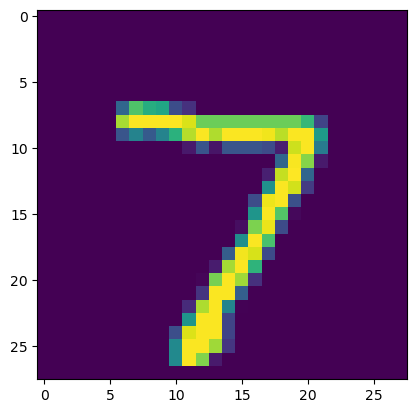

In [28]:
plt.imshow(x_test[0])



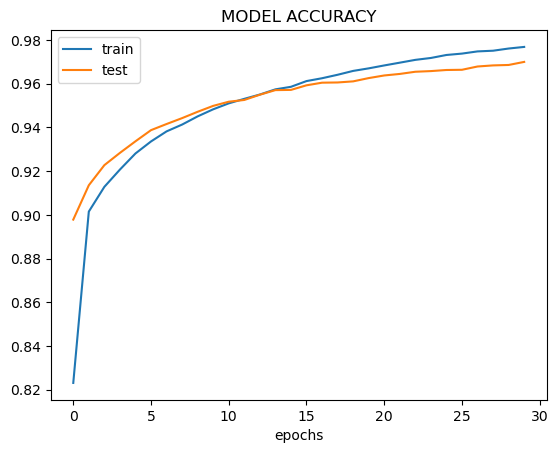

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


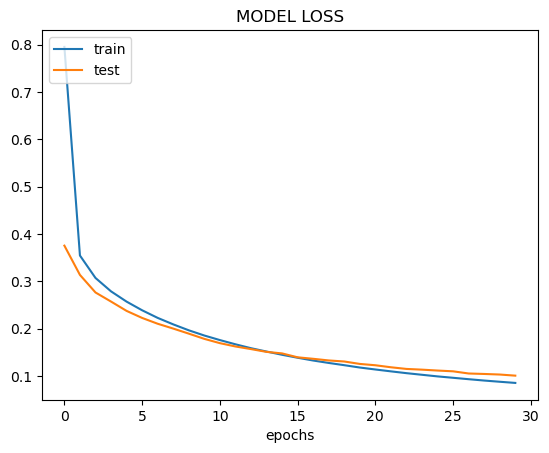

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
